# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [82]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [83]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 
import cv2


# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

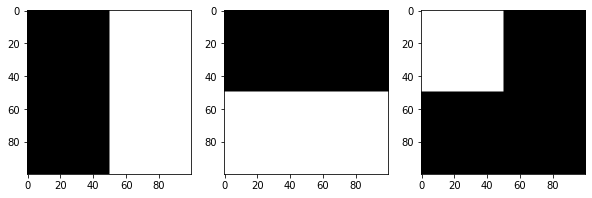

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


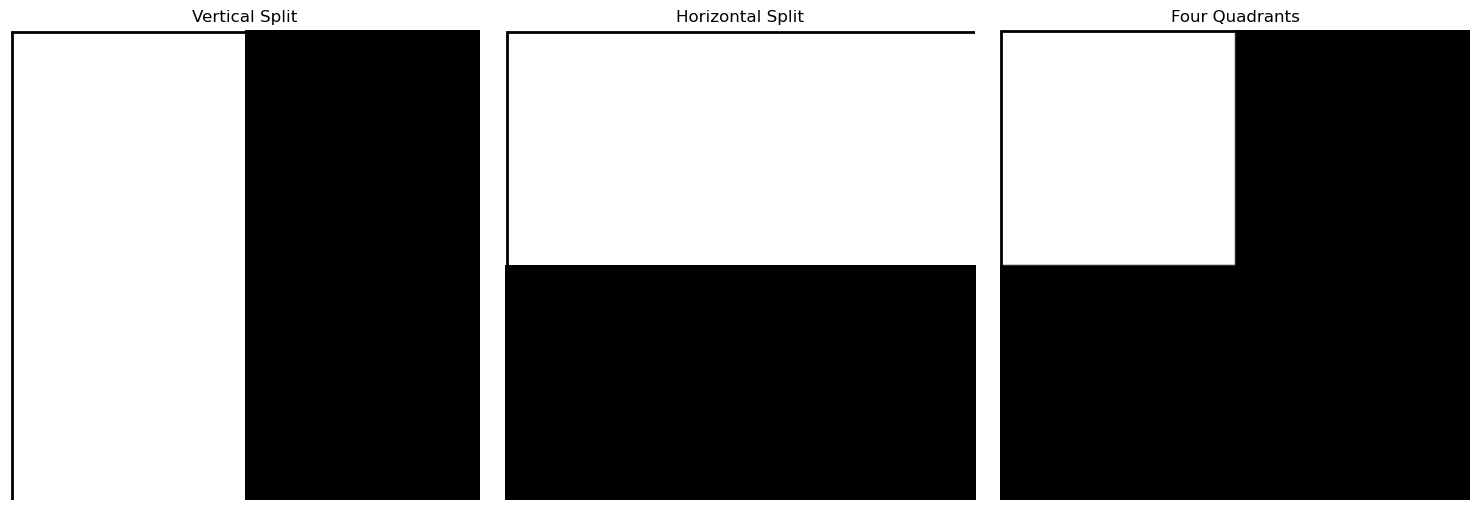

In [84]:
# Define the size of the images (100x100 pixels)
image_size = (100, 100)

# Create the first image (vertical split: white on the left and black on the right)
image1 = np.ones((image_size[0], image_size[1]), dtype=np.uint8) * 255  # Start with a white image (255 represents white)
image1[:, image_size[1]//2:] = 0  # Change the right half to black (0 represents black)

# Create the second image (horizontal split: white on the top and black on the bottom)
image2 = np.ones((image_size[0], image_size[1]), dtype=np.uint8) * 255  # Start with a white image
image2[image_size[0]//2:, :] = 0  # Change the bottom half to black

# Create the third image (split in all four quarters with black and white)
image3 = np.zeros((image_size[0]*2, image_size[1]*2, 3), dtype=np.uint8)  # Create a 200x200 image (for four quadrants)

# First quadrant (top-left): white (255 in all channels for RGB)
image3[:image_size[0], :image_size[1], :] = 255  # The upper-left quarter is white

# Second quadrant (top-right): black (0 in all channels for RGB)
image3[:image_size[0], image_size[1]:, :] = 0  # The upper-right quarter is black

# Third quadrant (bottom-left): black (0 in all channels for RGB)
image3[image_size[0]:, :image_size[1], :] = 0  # The lower-left quarter is black

# Fourth quadrant (bottom-right): white (255 in all channels for RGB)
image3[image_size[0]:, image_size[1]:, :] = 0  # The lower-right quarter is white

# Create a subplot with 1 row and 3 columns to display the images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display the first image (vertical split)
axes[0].imshow(image1, cmap='gray')  # Display in grayscale
axes[0].axis('off')  # Hide axis
axes[0].set_title('Vertical Split')  # Title for the image
axes[0].add_patch(Rectangle((0, 0), image_size[1], image_size[0], linewidth=2, edgecolor='black', facecolor='none'))  # Add a border

# Display the second image (horizontal split)
axes[1].imshow(image2, cmap='gray')  # Display in grayscale
axes[1].axis('off')  # Hide axis
axes[1].set_title('Horizontal Split')  # Title for the image
axes[1].add_patch(Rectangle((0, 0), image_size[1], image_size[0], linewidth=2, edgecolor='black', facecolor='none'))  # Add a border

# Display the third image (four quadrants with black and white)
axes[2].imshow(image3)  # Display in RGB color
axes[2].axis('off')  # Hide axis
axes[2].set_title('Four Quadrants')  # Title for the image
axes[2].add_patch(Rectangle((0, 0), image_size[1]*2, image_size[0]*2, linewidth=2, edgecolor='black', facecolor='none'))  # Add a border

# Adjust layout to make sure the images don't overlap
plt.tight_layout()


plt.show()


*   Use the above three images to create the following image

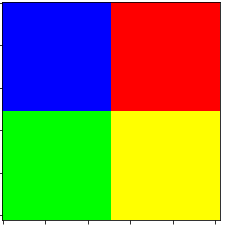
*Hint: Remember channels and color spaces*

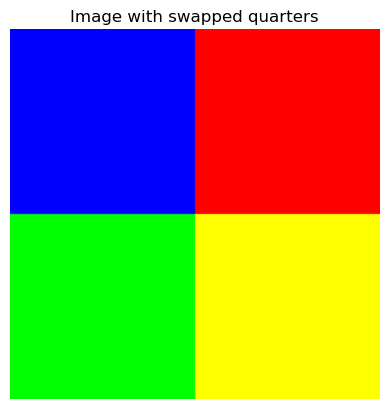

In [85]:
# Define the image size (100x100 for each quadrant)
image_size = (100, 100)

# Create a 200x200 image (4 quadrants)
image = np.zeros((image_size[0] * 2, image_size[1] * 2, 3), dtype=np.uint8)

# First quadrant (blue - top-left)
# Set the blue channel to 255 in the top-left quadrant
image[:image_size[0], :image_size[1], 2] = 255  # The blue channel is set to 255

# Second quadrant (red - top-right)
# Set the red channel to 255 in the top-right quadrant
image[:image_size[0], image_size[1]:, 0] = 255  # The red channel is set to 255

# Third quadrant (green - bottom-left)
# Set the green channel to 255 in the bottom-left quadrant
image[image_size[0]:, :image_size[1], 1] = 255  # The green channel is set to 255

# Fourth quadrant (yellow - bottom-right)
# Yellow is a combination of red and green, so we set both red and green channels to 255
image[image_size[0]:, image_size[1]:, 0] = 255  # Red channel
image[image_size[0]:, image_size[1]:, 1] = 255  # Green channel

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.title("Image with swapped quarters")
plt.show()


### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

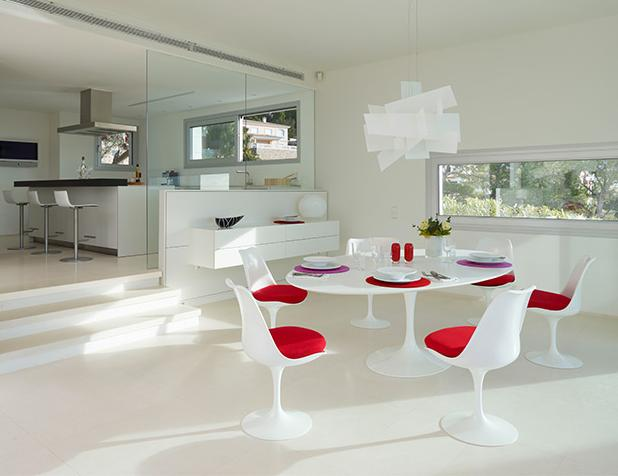

*   Extract individual channels and plot them using matplotlib subplot.



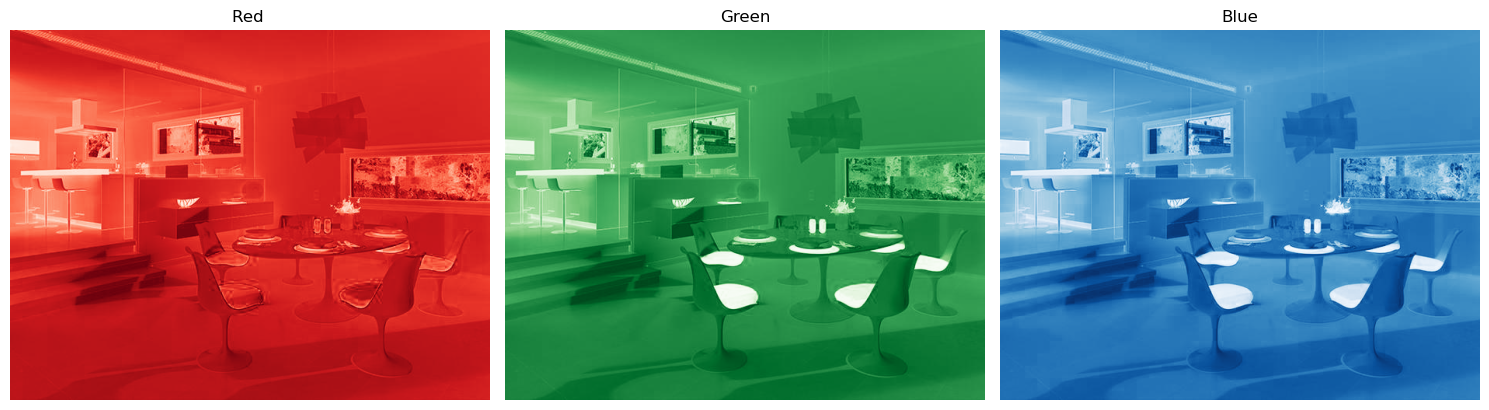

In [86]:
# Read the image using OpenCV
image = cv2.imread('images/sillas.jpg')

# Check if the image was loaded successfully
if image is None:
    print("Error: Image not found!")
else:
    # OpenCV reads images in BGR format (instead of RGB)
    # So we need to convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Extract the individual channels
    red_channel = image_rgb[:, :, 0]  # Red channel
    green_channel = image_rgb[:, :, 1]  # Green channel
    blue_channel = image_rgb[:, :, 2]  # Blue channel

    # Create a subplot with 1 row and 3 columns to display the channels
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Display the Red channel
    axes[0].imshow(red_channel, cmap='Reds')  # Using cmap to give it a red appearance
    axes[0].axis('off')  # Hide axes
    axes[0].set_title('Red ')

    # Display the Green channel
    axes[1].imshow(green_channel, cmap='Greens')  # Using cmap to give it a green appearance
    axes[1].axis('off')  # Hide axes
    axes[1].set_title('Green')

    # Display the Blue channel
    axes[2].imshow(blue_channel, cmap='Blues')  # Using cmap to give it a blue appearance
    axes[2].axis('off')  # Hide axes
    axes[2].set_title('Blue')

    # Adjust the layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()



*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

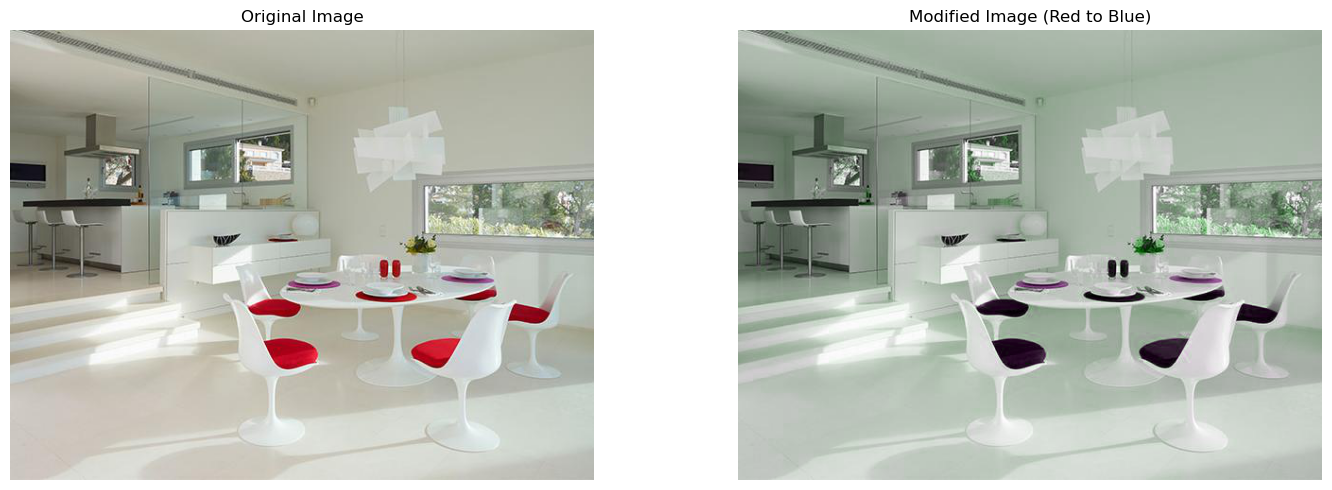

In [87]:
image = cv2.imread('images/sillas.jpg')

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create a modified image where red is changed to blue
modified_image = image_rgb.copy()  # Copy the original image to modify it

# Swap the red and blue channels
modified_image[:, :, 0], modified_image[:, :, 2] = modified_image[:, :, 2], modified_image[:, :, 0]

# Create a subplot with 1 row and 2 columns to display the original and modified images
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Display the original image
axes[0].imshow(image_rgb)
axes[0].axis('off')  # Hide axes
axes[0].set_title('Original Image')

# Display the modified image
axes[1].imshow(modified_image)
axes[1].axis('off')  # Hide axes
axes[1].set_title('Modified Image (Red to Blue)')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


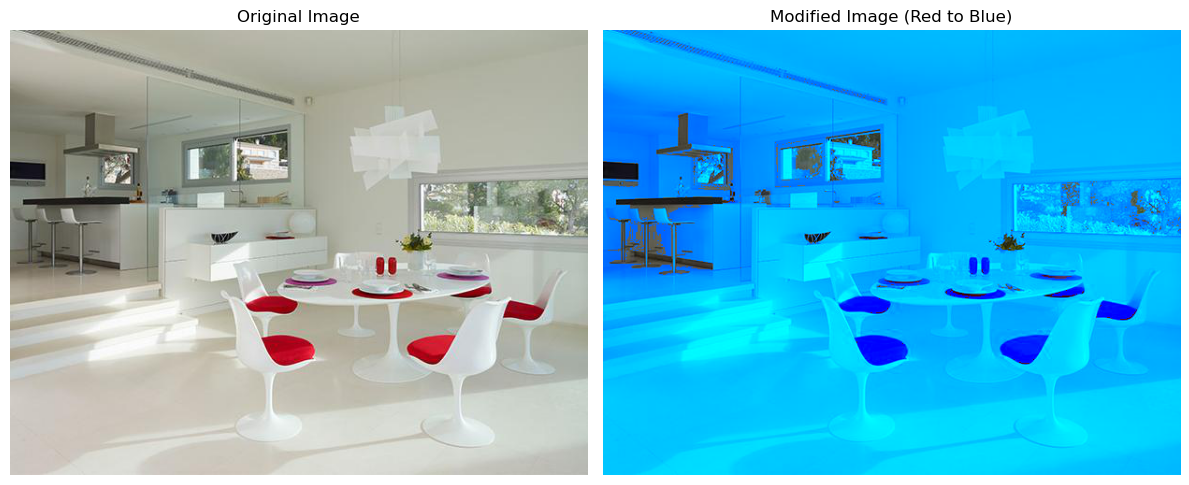

In [88]:
# Read the image using OpenCV
image = cv2.imread('images/sillas.jpg')

# OpenCV reads images in BGR (instead of RGB), so we need to convert it to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create a copy of the image to modify
image_modified = image_rgb.copy()

# Change every red pixel to blue: we look for red values (where the red channel is greater than a threshold)
# Identify red pixels (where the red channel values are higher than a threshold)
red_pixels = image_modified[:, :, 0] > 100  # Identifying red pixels (you can change 100 if needed)

# Replace every red pixel with blue
image_modified[red_pixels, 0] = 0  # Set red channel to zero (remove red color)
image_modified[red_pixels, 2] = 255  # Set blue channel to the maximum value (255)

# Display the original and modified images using subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image
axes[0].imshow(image_rgb)
axes[0].axis('off')  # Hide axes
axes[0].set_title('Original Image')

# Display the modified image
axes[1].imshow(image_modified)
axes[1].axis('off')  # Hide axes
axes[1].set_title('Modified Image (Red to Blue)')

# Adjust layout for better spacing
plt.tight_layout()

# Show the images
plt.show()


# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

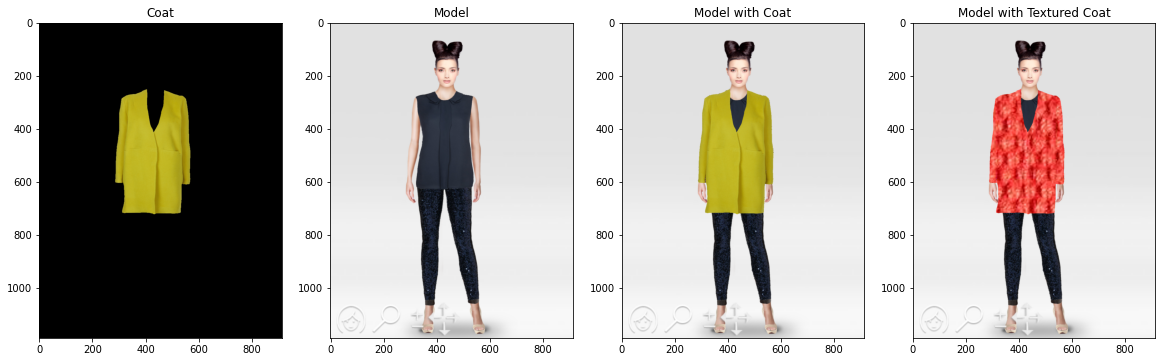

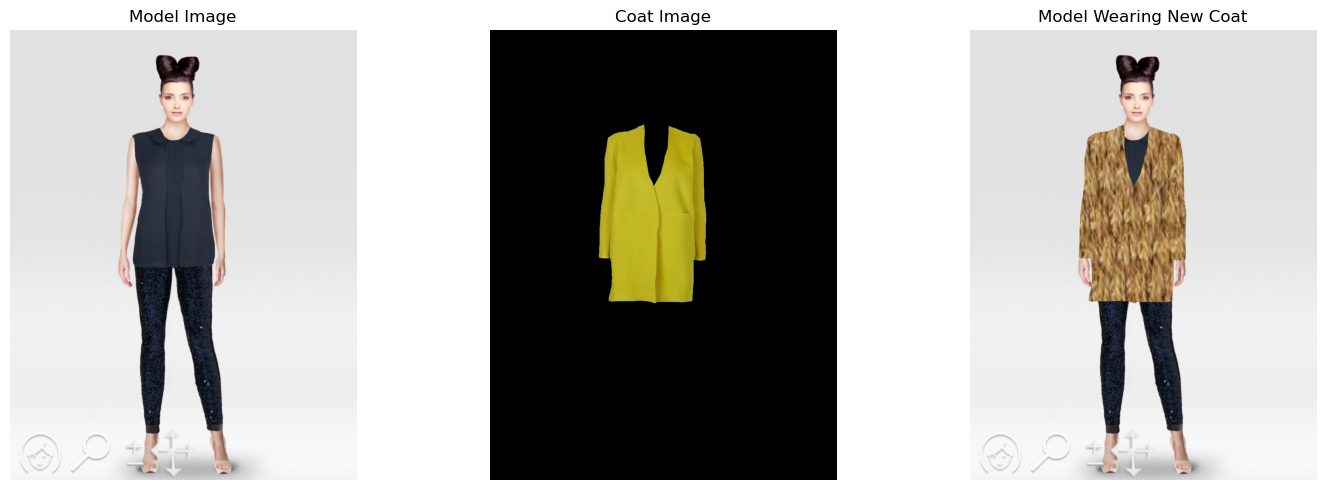

In [89]:

# Load the images
model = cv2.imread('images/model.png')
coat = cv2.imread('images/coat.png')
texture = cv2.imread('images/texture.png')  # Load any texture from the folder

# Convert the images to RGB (OpenCV loads images in BGR)
model_rgb = cv2.cvtColor(model, cv2.COLOR_BGR2RGB)
coat_rgb = cv2.cvtColor(coat, cv2.COLOR_BGR2RGB)
texture_rgb = cv2.cvtColor(texture, cv2.COLOR_BGR2RGB)

# Resize the texture to match the size of the coat
coat_height, coat_width = coat_rgb.shape[:2]
texture_resized = cv2.resize(texture_rgb, (coat_width, coat_height))

# Create a mask for the coat (assuming the coat is fully visible with no transparency)
# We can use a color threshold to create a mask. You might need to adjust the color range.
mask = np.all(coat_rgb != [0, 0, 0], axis=-1)  # Mask where the coat is not black (non-background)

# Replace the coat's region in the model image with the texture
model_with_coat = model_rgb.copy()

# Apply the texture to the model, replacing the coat area using the mask
model_with_coat[mask] = texture_resized[mask]

# Visualize the images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display the model image
axes[0].imshow(model_rgb)
axes[0].axis('off')
axes[0].set_title('Model Image')

# Display the coat image
axes[1].imshow(coat_rgb)
axes[1].axis('off')
axes[1].set_title('Coat Image')

# Display the final image with the new coat texture
axes[2].imshow(model_with_coat)
axes[2].axis('off')
axes[2].set_title('Model Wearing New Coat')

plt.tight_layout()
plt.show()


# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




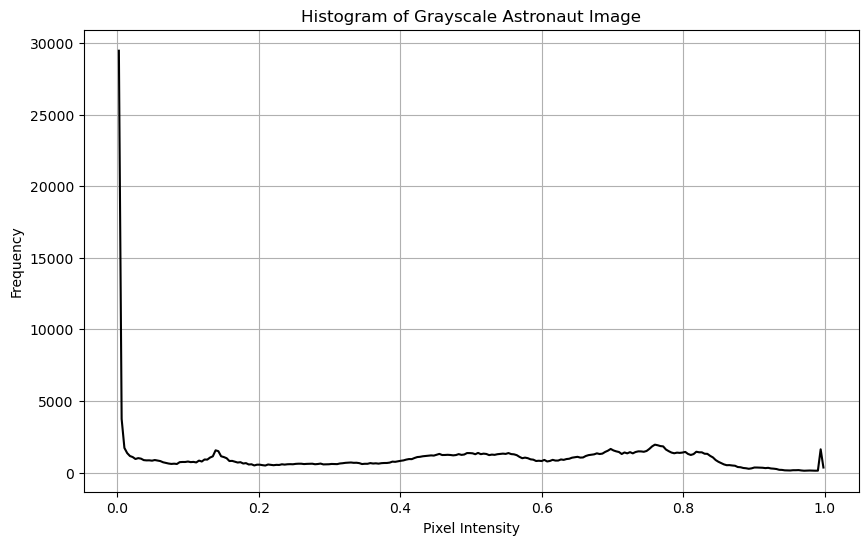

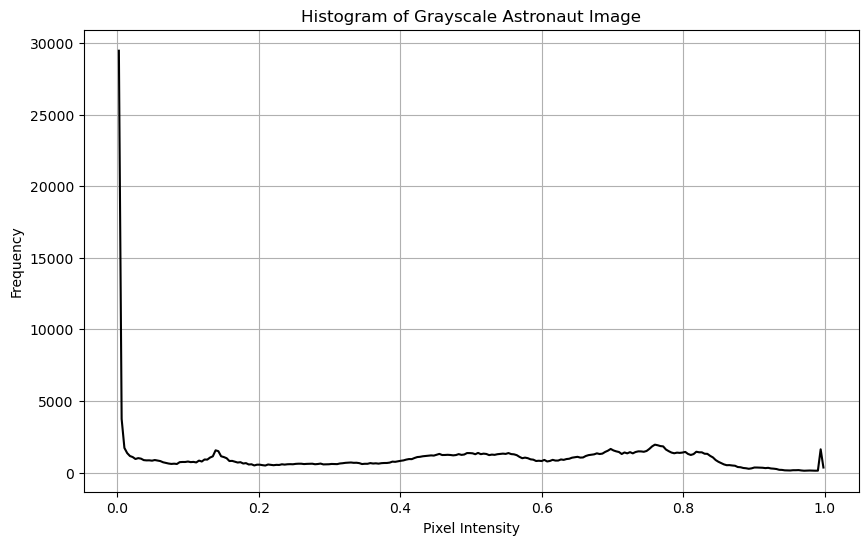

In [90]:

from skimage.exposure import histogram

# Step 1: Load the 'astronaut' image from the skimage data module
image = data.astronaut()

# Step 2: Convert the image to grayscale
# The image is originally in RGB, so we convert it to grayscale using the rgb2gray function
image_gray = color.rgb2gray(image)

# Step 3: Compute the histogram of the grayscale image
# The histogram function returns the intensity levels and their corresponding frequency
hist, bin_centers = histogram(image_gray)

# Step 4: Plot the histogram using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, hist, color='black')
plt.title('Histogram of Grayscale Astronaut Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 1: Load the 'astronaut' image from the skimage data module
image = data.astronaut()

# Step 2: Convert the image to grayscale
# The image is originally in RGB, so we convert it to grayscale using the rgb2gray function
image_gray = color.rgb2gray(image)

# Step 3: Compute the histogram of the grayscale image
# The histogram function returns the intensity levels and their corresponding frequency
hist, bin_centers = histogram(image_gray)

# Step 4: Plot the histogram using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, hist, color='black')
plt.title('Histogram of Grayscale Astronaut Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

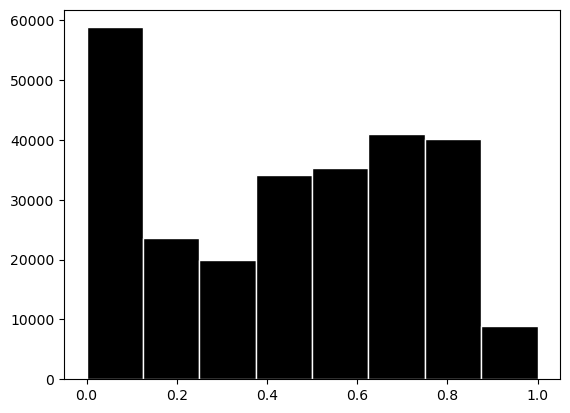

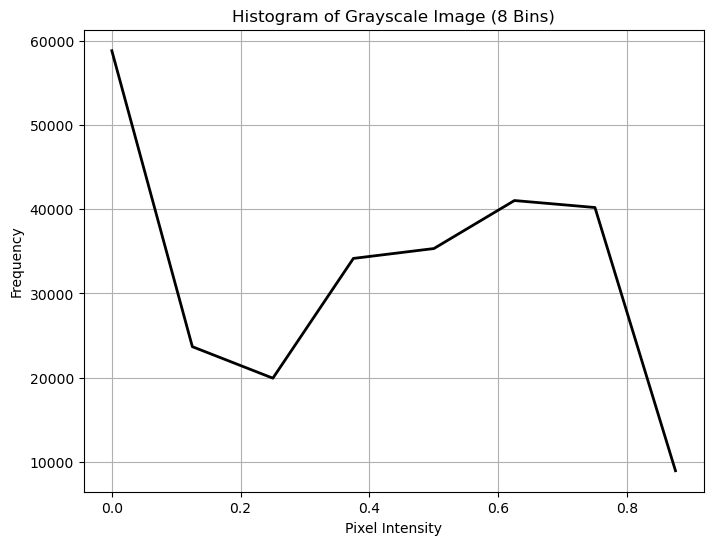

In [91]:

# Read the 'astronaut' image from skimage's data module
image = data.astronaut()

# Convert the image to grayscale
image_gray = color.rgb2gray(image)

# Compute the histogram with 8 bins using the numpy.histogram method
# This will divide the pixel intensities into 8 bins
counts, bin_edges, _ = plt.hist(image_gray.ravel(), bins=8, range=(0, 1), color='black', edgecolor='white')

# Plot the histogram using matplotlib
plt.figure(figsize=(8, 6))
plt.plot(bin_edges[:-1], counts, color='black', lw=2)  # Plot the histogram (ignoring last bin edge)
plt.title("Histogram of Grayscale Image (8 Bins)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()




*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

*(Double-click or enter to edit)*

...

In [92]:
'''Low bin count: Provides a coarse, simple view of the data but may hide important details and subtle patterns.
High bin count: Provides more detail and can reveal small variations, but may also add noise and make interpretation more difficult.
The correct bin count depends on the data, the analysis goal, and can be guided by rules like Sturges' or Freedman-Diaconis, or through experimentation.'''

"Low bin count: Provides a coarse, simple view of the data but may hide important details and subtle patterns.\nHigh bin count: Provides more detail and can reveal small variations, but may also add noise and make interpretation more difficult.\nThe correct bin count depends on the data, the analysis goal, and can be guided by rules like Sturges' or Freedman-Diaconis, or through experimentation."


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


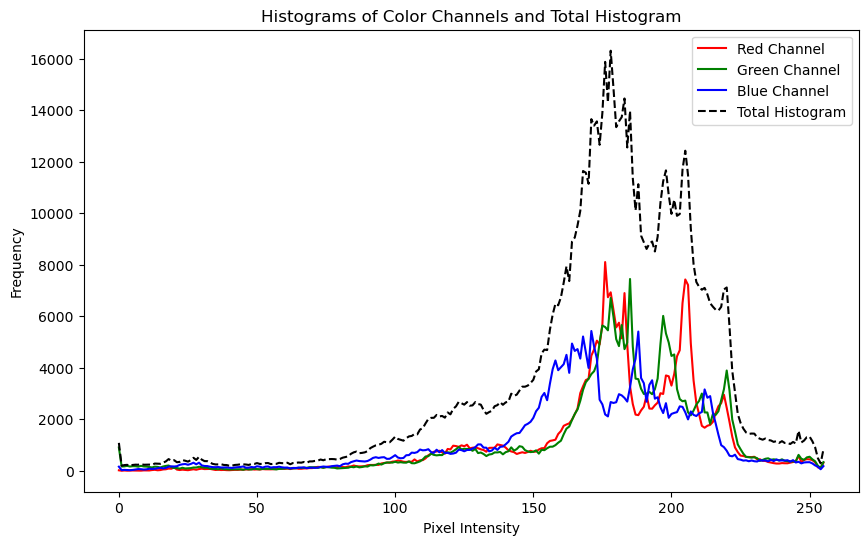

In [93]:

# Step 1: Read the color image using OpenCV
image = cv2.imread('images/sillas.jpg')  # Replace with your image path

# OpenCV reads images in BGR format, so we need to convert it to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 2: Compute the histograms for each channel
# We'll use numpy.histogram for each channel.
# Image shape: (height, width, channels), so we can extract each channel separately
red_channel = image_rgb[:, :, 0]
green_channel = image_rgb[:, :, 1]
blue_channel = image_rgb[:, :, 2]

# Compute histograms for each channel with 256 bins (one for each possible intensity value)
red_hist = np.histogram(red_channel, bins=256, range=(0, 256))[0]
green_hist = np.histogram(green_channel, bins=256, range=(0, 256))[0]
blue_hist = np.histogram(blue_channel, bins=256, range=(0, 256))[0]

# Step 3: Plot the histograms for each channel and the total histogram

# Total histogram (sum of the histograms of the three channels)
total_hist = red_hist + green_hist + blue_hist

# Plotting
plt.figure(figsize=(10, 6))

# Plot individual channel histograms
plt.plot(red_hist, color='red', label='Red Channel')
plt.plot(green_hist, color='green', label='Green Channel')
plt.plot(blue_hist, color='blue', label='Blue Channel')

# Plot total histogram (sum of all channels)
plt.plot(total_hist, color='black', label='Total Histogram', linestyle='dashed')

# Adding title and labels
plt.title('Histograms of Color Channels and Total Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

# Show plot
plt.show()



### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



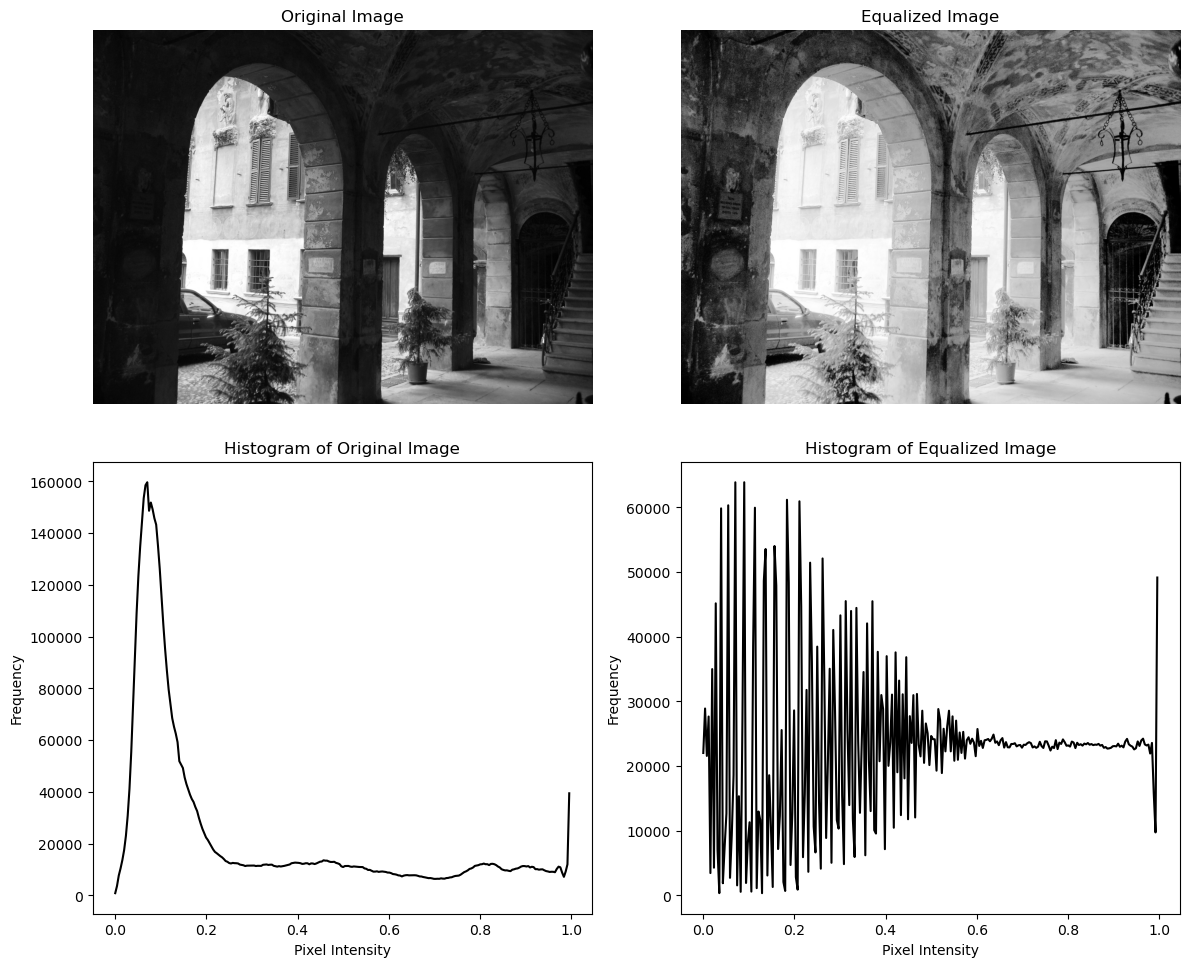

In [95]:
import matplotlib.pyplot as plt
from skimage import exposure, io, color
import numpy as np

# Step 1: Read the image
image = io.imread('images/aquatermi_lowcontrast.jpg')  # Replace with the correct image path

# Convert the image to grayscale (if it's not already)
image_gray = color.rgb2gray(image)

# Step 2: Compute the histogram of the original grayscale image
original_hist, bin_edges = np.histogram(image_gray, bins=256, range=(0, 1))

# Step 3: Perform histogram equalization to enhance the contrast
image_eq = exposure.equalize_hist(image_gray)

# Compute the histogram of the equalized image
equalized_hist, _ = np.histogram(image_eq, bins=256, range=(0, 1))

# Step 4: Plot the original and equalized images along with their histograms

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot original image
axes[0, 0].imshow(image_gray, cmap='gray')
axes[0, 0].axis('off')
axes[0, 0].set_title('Original Image')

# Plot equalized image
axes[0, 1].imshow(image_eq, cmap='gray')
axes[0, 1].axis('off')
axes[0, 1].set_title('Equalized Image')

# Plot original histogram
axes[1, 0].plot(bin_edges[:-1], original_hist, color='black')
axes[1, 0].set_title('Histogram of Original Image')
axes[1, 0].set_xlabel('Pixel Intensity')
axes[1, 0].set_ylabel('Frequency')

# Plot equalized histogram
axes[1, 1].plot(bin_edges[:-1], equalized_hist, color='black')
axes[1, 1].set_title('Histogram of Equalized Image')
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

*(Double-click or enter to edit)*

...

In [96]:
'''Histogram Equalization is more advanced and works by redistributing the pixel intensities based on their cumulative distribution, which can lead to more dynamic and global contrast enhancement. However, it may lead to over-enhancement or artifacts in some areas.
Linear Contrast Stretch is a simpler, more intuitive technique that applies a linear transformation to stretch pixel values across the full intensity range, resulting in an overall contrast enhancement but without considering local intensity distributions or uneven contrast.'''

'Histogram Equalization is more advanced and works by redistributing the pixel intensities based on their cumulative distribution, which can lead to more dynamic and global contrast enhancement. However, it may lead to over-enhancement or artifacts in some areas.\nLinear Contrast Stretch is a simpler, more intuitive technique that applies a linear transformation to stretch pixel values across the full intensity range, resulting in an overall contrast enhancement but without considering local intensity distributions or uneven contrast.'

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



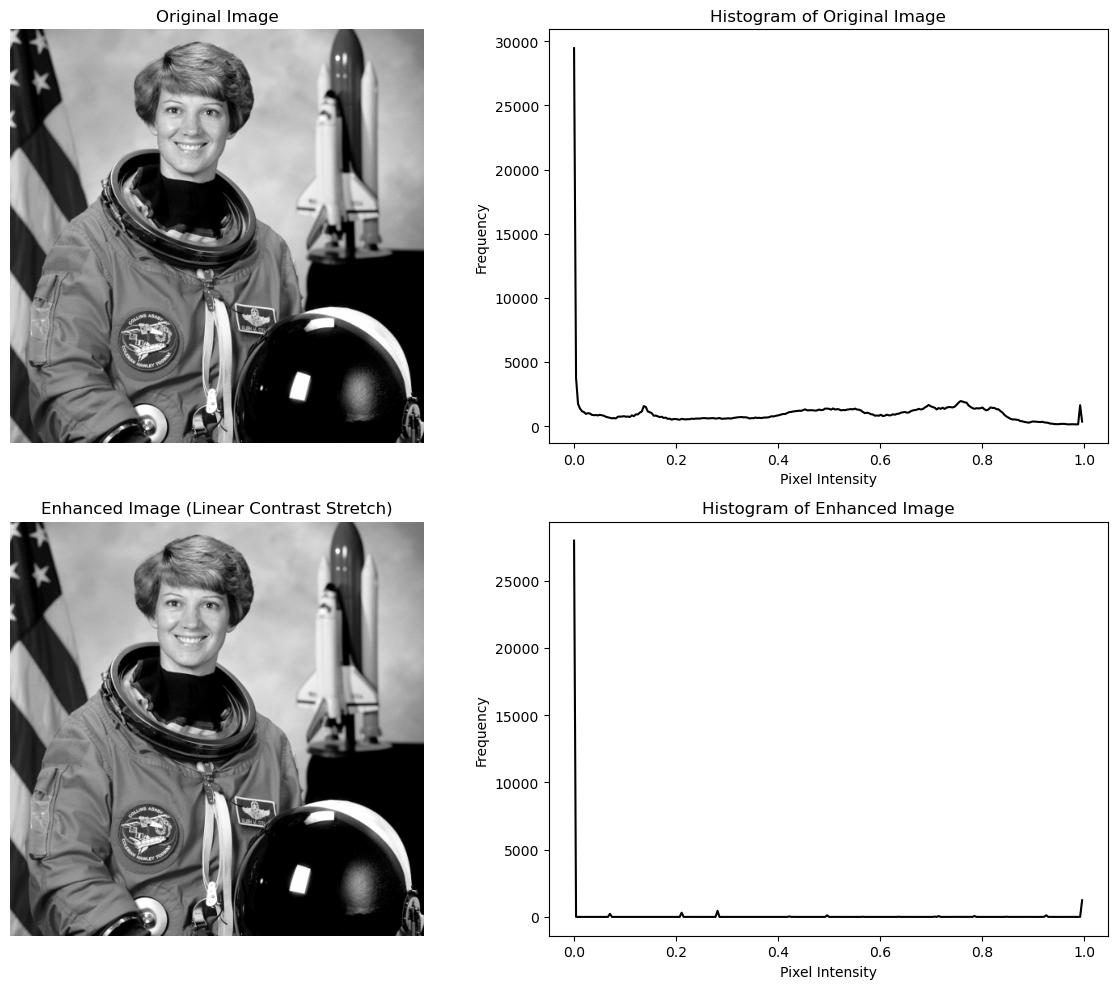

In [98]:

# Function to perform linear contrast stretching
def linear_contrast_stretch(image, L_min=0, L_max=255):
    """
    Perform linear contrast stretching on a grayscale image.
    
    Parameters:
        image: Grayscale image array (2D).
        L_min: The minimum intensity of the output image (default is 0).
        L_max: The maximum intensity of the output image (default is 255).
    
    Returns:
        Enhanced image array after contrast stretching.
    """
    # Find the minimum and maximum intensity values in the image
    R_min = np.min(image)
    R_max = np.max(image)
    
    # Apply the linear contrast stretching formula
    stretched_image = ((image - R_min) * (L_max - L_min)) / (R_max - R_min) + L_min
    
    # Clip the values to be in the valid range [0, 255]
    stretched_image = np.clip(stretched_image, L_min, L_max)
    
    return stretched_image

# Read the astronaut image from skimage data (for demonstration)
image = data.astronaut()

# Convert to grayscale
image_gray = color.rgb2gray(image)

# Apply linear contrast stretching
enhanced_image = linear_contrast_stretch(image_gray)

# Compute histograms
# For the original grayscale image
hist_original, bins_original = np.histogram(image_gray.flatten(), bins=256, range=(0, 1))

# For the enhanced grayscale image
hist_enhanced, bins_enhanced = np.histogram(enhanced_image.flatten(), bins=256, range=(0, 1))

# Set up the subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot the original grayscale image
axes[0, 0].imshow(image_gray, cmap='gray')
axes[0, 0].axis('off')
axes[0, 0].set_title('Original Image')

# Plot the histogram of the original image
axes[0, 1].plot(bins_original[:-1], hist_original, color='black')
axes[0, 1].set_title('Histogram of Original Image')
axes[0, 1].set_xlabel('Pixel Intensity')
axes[0, 1].set_ylabel('Frequency')

# Plot the enhanced grayscale image
axes[1, 0].imshow(enhanced_image, cmap='gray')
axes[1, 0].axis('off')
axes[1, 0].set_title('Enhanced Image (Linear Contrast Stretch)')

# Plot the histogram of the enhanced image
axes[1, 1].plot(bins_enhanced[:-1], hist_enhanced, color='black')
axes[1, 1].set_title('Histogram of Enhanced Image')
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the images and histograms
plt.show()


# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




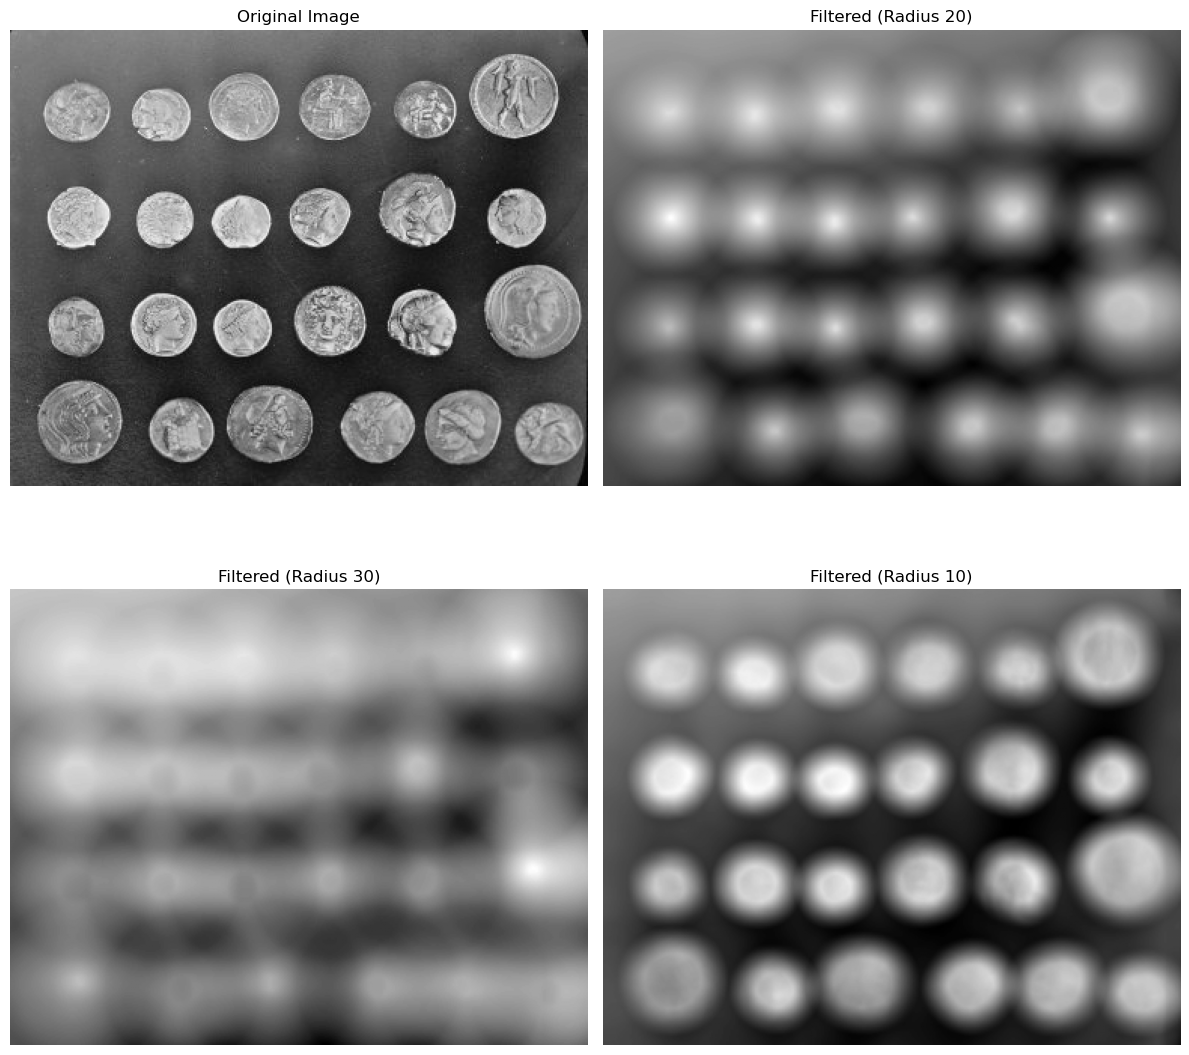

In [102]:
# Load the coins image from skimage.data module
image = data.coins()

# Define the disk structuring element with radius 20
selem_20 = morphology.disk(20)

# Apply the mean filter with radius 20
filtered_20 = filters.rank.mean(image, selem_20)

# Increase the radius by 10, so the new radius is 30
selem_30 = morphology.disk(30)

# Apply the mean filter with radius 30
filtered_30 = filters.rank.mean(image, selem_30)

# Reduce the radius by 10, so the new radius is 10
selem_10 = morphology.disk(10)

# Apply the mean filter with radius 10
filtered_10 = filters.rank.mean(image, selem_10)

# Plot all the images: original image, and the three filtered images
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Original image
axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title("Original Image")
axs[0, 0].axis('off')

# Filtered image with radius 20
axs[0, 1].imshow(filtered_20, cmap='gray')
axs[0, 1].set_title("Filtered (Radius 20)")
axs[0, 1].axis('off')

# Filtered image with radius 30
axs[1, 0].imshow(filtered_30, cmap='gray')
axs[1, 0].set_title("Filtered (Radius 30)")
axs[1, 0].axis('off')

# Filtered image with radius 10
axs[1, 1].imshow(filtered_10, cmap='gray')
axs[1, 1].set_title("Filtered (Radius 10)")
axs[1, 1].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

/var/folders/95/zw02gd512q5873285k0_qmcm0000gn/T/ipykernel_49350/3807266582.py:5: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  selem_square = morphology.square(20)  # Square structuring element with side length 20
/var/folders/95/zw02gd512q5873285k0_qmcm0000gn/T/ipykernel_49350/3807266582.py:6: FutureWarning: `rectangle` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  selem_rectangle = morphology.rectangle(20, 30)  # Rectangle with height 20 and width 30


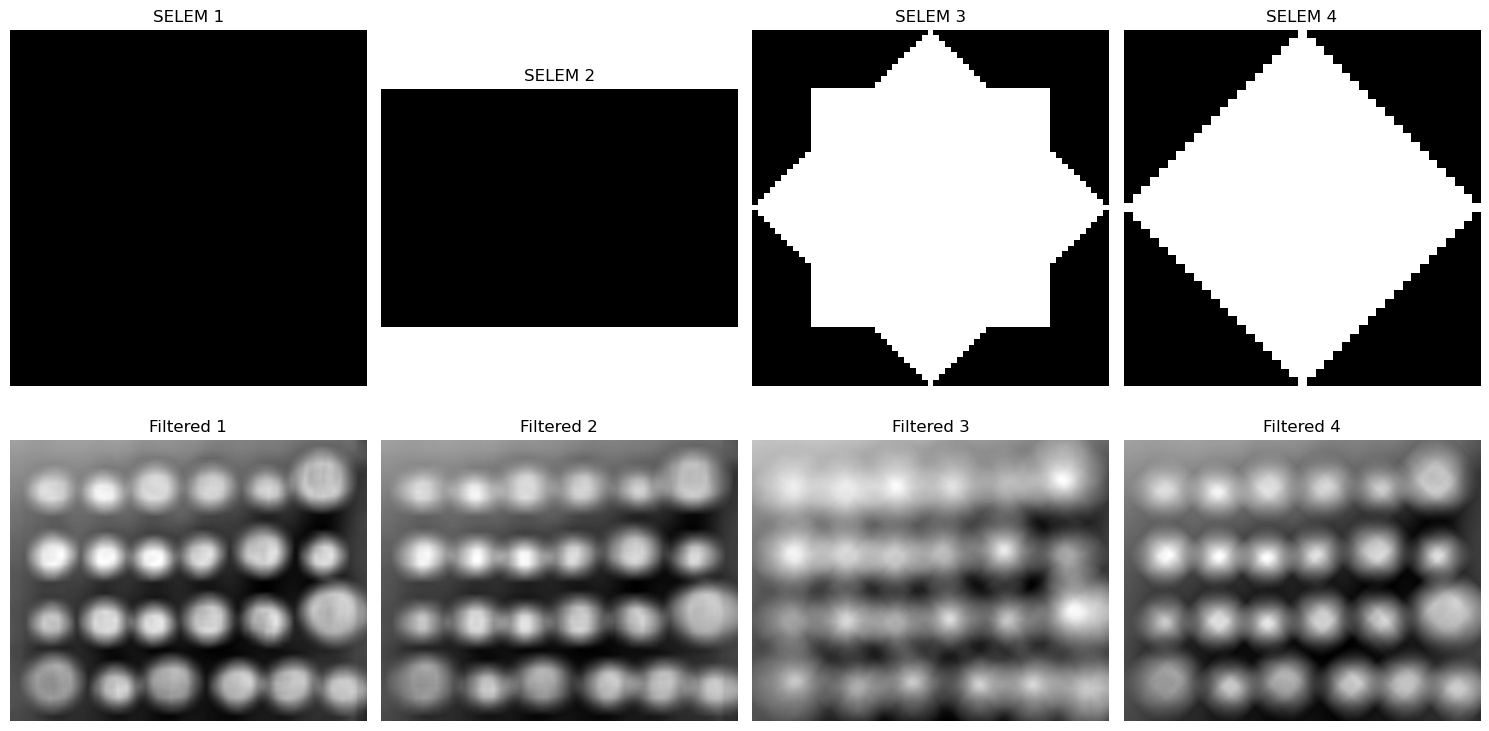

In [106]:

# Load the coins image
image = data.coins()

# Define structuring elements using appropriate functions
selem_square = morphology.square(20)  # Square structuring element with side length 20
selem_rectangle = morphology.rectangle(20, 30)  # Rectangle with height 20 and width 30
selem_star = morphology.star(20)  # Star-shaped structuring element with radius 20
selem_diamond = morphology.diamond(20)  # Diamond-shaped structuring element with radius 20

# Apply mean filter with different structuring elements
filtered_square = filters.rank.mean(image, selem_square)
filtered_rectangle = filters.rank.mean(image, selem_rectangle)
filtered_star = filters.rank.mean(image, selem_star)
filtered_diamond = filters.rank.mean(image, selem_diamond)

# List of structuring elements and filtered images
selems = [selem_square, selem_rectangle, selem_star, selem_diamond]
filtered_images = [filtered_square, filtered_rectangle, filtered_star, filtered_diamond]

# Plotting the images
fig, axs = plt.subplots(2, len(selems), figsize=(15, 8))

for i, selem in enumerate(selems):
    # Plot the structuring element in the first row
    axs[0, i].imshow(selem, cmap='gray')
    axs[0, i].set_title(f"SELEM {i + 1}")
    axs[0, i].axis('off')

    # Plot the filtered image in the second row
    axs[1, i].imshow(filtered_images[i], cmap='gray')
    axs[1, i].set_title(f"Filtered {i + 1}")
    axs[1, i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

*(Double-click or enter to edit)*

...

In [107]:
'''the choice of radius directly impacts the strength of the smoothing effect, and the balance between noise reduction and detail preservation depends on selecting the optimal radius size for your image and desired result.'''

'the choice of radius directly impacts the strength of the smoothing effect, and the balance between noise reduction and detail preservation depends on selecting the optimal radius size for your image and desired result.'


*   What is the observed behaviour with difference in the structuring element?



**Solution**

*(Double-click or enter to edit)*

...

In [109]:
'''The behavior of the mean filter changes with different **structuring elements** (selem). A **disk** structuring element provides smooth, organic smoothing, which works well for reducing noise without distorting the image too much. A **square** structuring element applies a more angular smoothing, sometimes creating blocky effects, especially with larger sizes. The **rectangle** element offers directional smoothing, often emphasizing horizontal or vertical patterns, depending on its orientation. Meanwhile, the **star** structuring element creates a radial smoothing effect, adding complexity to the image. Each structuring element impacts how the filter smooths the image, influencing both the preservation of details and the overall visual result.'''

'The behavior of the mean filter changes with different **structuring elements** (selem). A **disk** structuring element provides smooth, organic smoothing, which works well for reducing noise without distorting the image too much. A **square** structuring element applies a more angular smoothing, sometimes creating blocky effects, especially with larger sizes. The **rectangle** element offers directional smoothing, often emphasizing horizontal or vertical patterns, depending on its orientation. Meanwhile, the **star** structuring element creates a radial smoothing effect, adding complexity to the image. Each structuring element impacts how the filter smooths the image, influencing both the preservation of details and the overall visual result.'



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

*(Double-click or enter to edit)*

...

In [110]:
'''The **mean filter** and **Gaussian filter** are both used for image smoothing and noise reduction, but they differ in their approaches. The **mean filter** works by averaging the pixel values in a specified neighborhood around each pixel, giving equal weight to all pixels. While this filter is simple and fast, it tends to blur edges and may cause a loss of fine details. In contrast, the **Gaussian filter** applies a weighted average, where pixels closer to the center of the neighborhood have a higher influence based on the Gaussian distribution. This results in a softer, more natural blur and better edge preservation compared to the mean filter. The Gaussian filter is often preferred for more sophisticated smoothing tasks, as it reduces noise while maintaining sharper transitions between regions. While the mean filter is computationally simpler, the Gaussian filter provides a more refined and visually appealing result, especially for applications requiring subtle image enhancements.'''

'The **mean filter** and **Gaussian filter** are both used for image smoothing and noise reduction, but they differ in their approaches. The **mean filter** works by averaging the pixel values in a specified neighborhood around each pixel, giving equal weight to all pixels. While this filter is simple and fast, it tends to blur edges and may cause a loss of fine details. In contrast, the **Gaussian filter** applies a weighted average, where pixels closer to the center of the neighborhood have a higher influence based on the Gaussian distribution. This results in a softer, more natural blur and better edge preservation compared to the mean filter. The Gaussian filter is often preferred for more sophisticated smoothing tasks, as it reduces noise while maintaining sharper transitions between regions. While the mean filter is computationally simpler, the Gaussian filter provides a more refined and visually appealing result, especially for applications requiring subtle image enhancements.'

In [111]:
'''**Mean filters** are typically used in situations where simplicity and speed are prioritized over preserving fine details. They are often applied in basic noise reduction tasks, such as removing salt-and-pepper noise in images. Because of their simplicity, mean filters are computationally efficient and can be used in real-time applications or where the processing power is limited. However, they are less suitable for tasks that require edge preservation or subtle smoothing.

On the other hand, **Gaussian filters** are preferred when higher quality smoothing is needed, especially when preserving edges and finer details in the image. They are commonly used in advanced image processing applications like denoising, edge detection, and in pre-processing steps for computer vision tasks such as feature extraction or object recognition. The Gaussian filter’s weighted averaging preserves the natural appearance of edges while effectively smoothing out noise. It is especially useful in tasks where image quality and subtlety are important, such as medical imaging, photography, or object tracking.'''

'**Mean filters** are typically used in situations where simplicity and speed are prioritized over preserving fine details. They are often applied in basic noise reduction tasks, such as removing salt-and-pepper noise in images. Because of their simplicity, mean filters are computationally efficient and can be used in real-time applications or where the processing power is limited. However, they are less suitable for tasks that require edge preservation or subtle smoothing.\n\nOn the other hand, **Gaussian filters** are preferred when higher quality smoothing is needed, especially when preserving edges and finer details in the image. They are commonly used in advanced image processing applications like denoising, edge detection, and in pre-processing steps for computer vision tasks such as feature extraction or object recognition. The Gaussian filter’s weighted averaging preserves the natural appearance of edges while effectively smoothing out noise. It is especially useful in tasks wh